# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import json
from zipfile import ZipFile
from PIL import Image


In [ ]:
# kaggle_credentails = json.load(open("kaggle.json"))

# os.environ["KAGGLE_USERNAME"] = kaggle_credentails["username"]
# os.environ["KAGGLE_KEY"] = kaggle_credentails["key"]

# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall()


new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


## Data Preprocessing

### Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))



### Compiling and Training Phase

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 170s 72ms/step - loss: 1.4417 - accuracy: 0.5767 - val_loss: 0.5750 - val_accuracy: 0.8150
Epoch 2/10
2197/2197 [==============================] - 163s 74ms/step - loss: 0.4638 - accuracy: 0.8535 - val_loss: 0.3378 - val_accuracy: 0.8924
Epoch 3/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.2734 - accuracy: 0.9111 - val_loss: 0.3067 - val_accuracy: 0.9046
Epoch 4/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1858 - accuracy: 0.9400 - val_loss: 0.1645 - val_accuracy: 0.9471
Epoch 5/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1353 - accuracy: 0.9558 - val_loss: 0.2167 - val_accuracy: 0.9324
Epoch 6/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.1121 - accuracy: 0.9635 - val_loss: 0.1151 - val_accuracy: 0.9640
Epoch 7/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.0841 - accuracy: 0.9725 - val_loss: 0

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 52s 24ms/step - loss: 0.0792 - accuracy: 0.9763
Training accuracy: 0.976314127445221


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 [==============================] - 14s 25ms/step - loss: 0.1965 - accuracy: 0.9470
Validation accuracy: 0.9469610452651978


### Saving Model

In [ ]:
cnn.save('trained_plant_disease_model.keras')


In [ ]:
training_history.history #Return Dictionary of history


{'loss': [1.4416553974151611,
  0.4637961983680725,
  0.27341267466545105,
  0.1857723891735077,
  0.13525964319705963,
  0.11207209527492523,
  0.08412580192089081,
  0.07341452687978745,
  0.06222223490476608,
  0.056014761328697205],
 'accuracy': [0.5767266750335693,
  0.8534746170043945,
  0.9111031889915466,
  0.940024197101593,
  0.9558432102203369,
  0.9635109305381775,
  0.97247314453125,
  0.97584468126297,
  0.979714035987854,
  0.9812788963317871],
 'val_loss': [0.574959933757782,
  0.33778977394104004,
  0.3067188560962677,
  0.1644851267337799,
  0.21668489277362823,
  0.11509102582931519,
  0.21940411627292633,
  0.18094564974308014,
  0.1666143238544464,
  0.19651895761489868],
 'val_accuracy': [0.8150466680526733,
  0.8923856019973755,
  0.9046210050582886,
  0.9470748901367188,
  0.932392418384552,
  0.9640336632728577,
  0.9344411492347717,
  0.9471318125724792,
  0.9529933929443359,
  0.9469610452651978]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

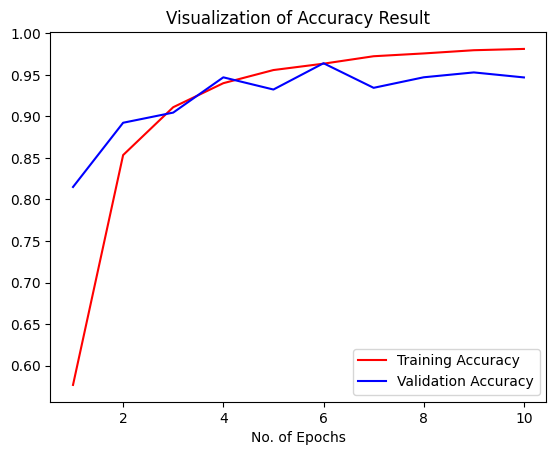

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names


In [ ]:
len(class_name)


38

In [ ]:
!pwd


/content


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 33 files belonging to 1 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


33/33 [==============================] - 0s 4ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [ ]:
Y_true


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [ ]:
predicted_categories


<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2,  2,  0,  0, 20,  8,  8,  8, 20, 20,  3, 20, 20, 22, 22,
       29, 29, 33, 29, 29, 34, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)


In [ ]:
len(Y_true)


33

In [ ]:
len(predicted_categories)


33

In [ ]:
# # Precision Recall Fscore
# print(classification_report(Y_true,predicted_categories,target_names=class_name))


ValueError: Number of classes, 11, does not match size of target_names, 38. Try specifying the labels parameter

### Confusion Matrix Visualization

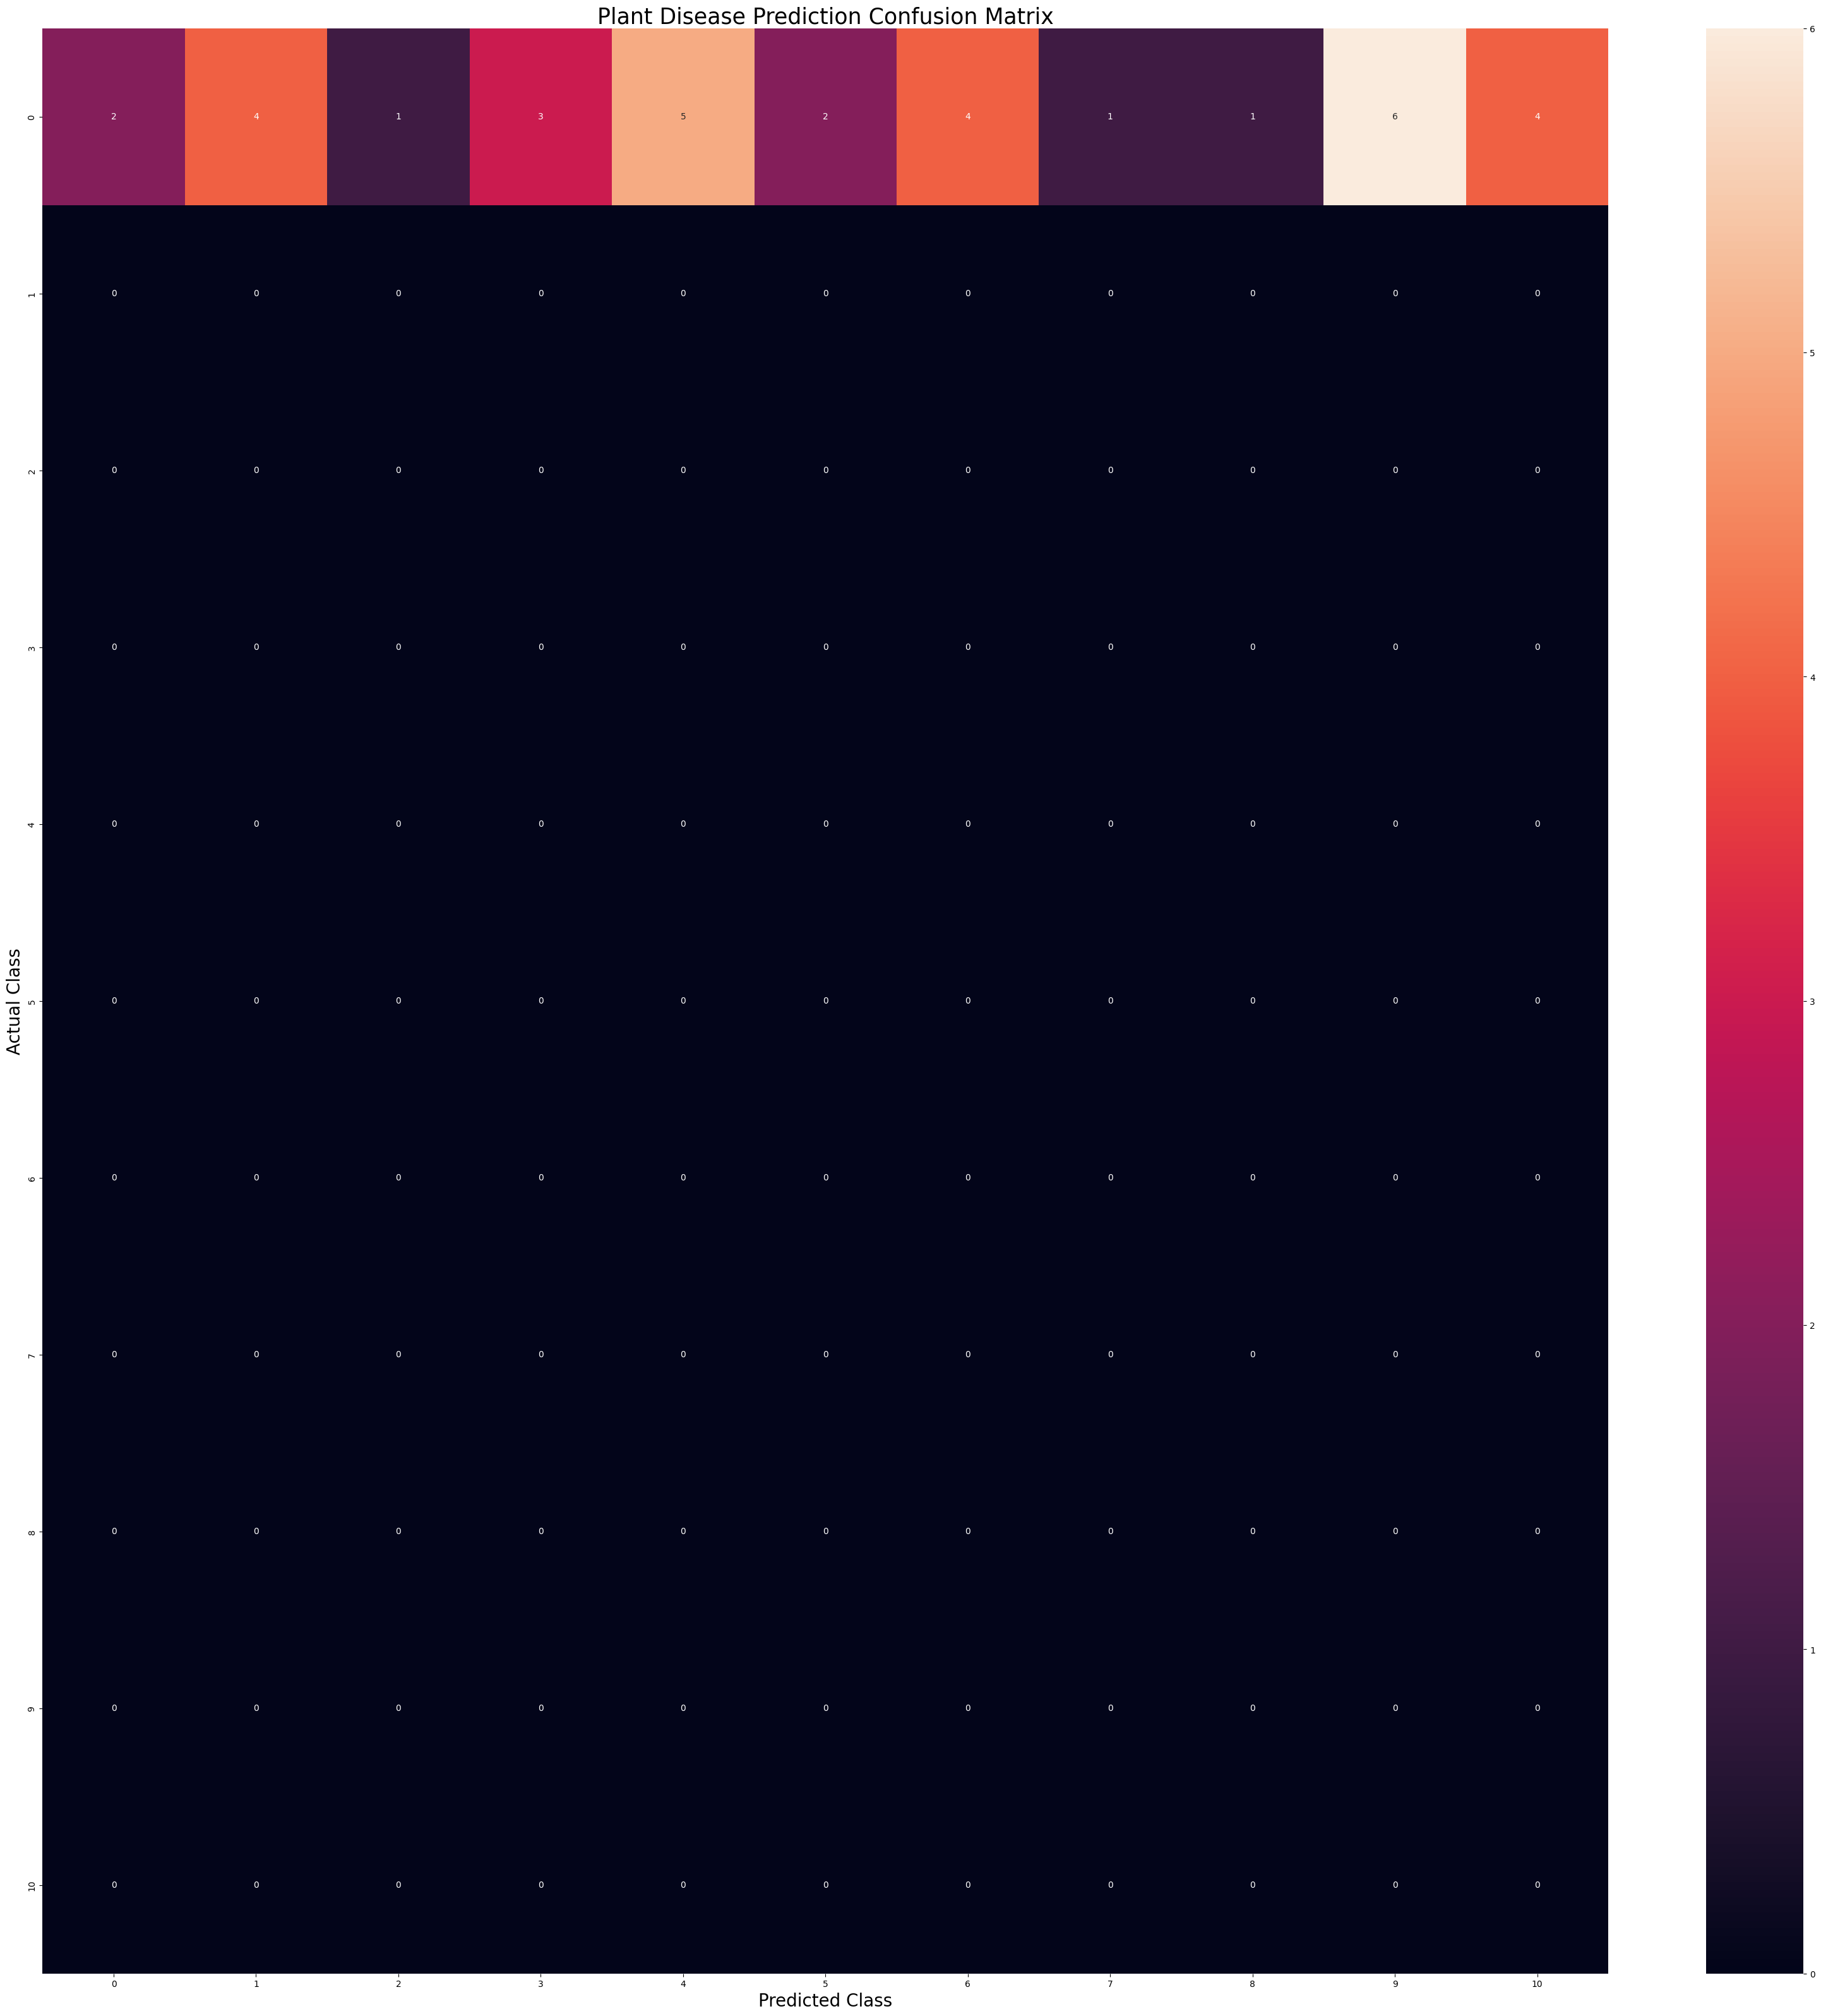

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
